<h1>Preliminaries</h1>
<b>>>></b> Here we are doing some initial stuff. Such as fit the display to make the notebook convinient, import tools, and load the dataset. 

In [1]:
# Increase my page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Ignore annoying warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Import the data
from keras.datasets import mnist
import warnings

# Import tools
from keras import backend as K
import matplotlib.pyplot as plt
# have to install this using conda : "conda install -c conda-forge scikit-plot" (https://github.com/reiinakano/scikit-plot)
import scikitplot as skplt
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.activations import linear
from keras.activations import relu
from keras.activations import softmax
from keras.activations import softmax
from keras.optimizers import adam
from keras.losses import sparse_categorical_crossentropy
from keras import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import numpy as np

# Load the data and split into train set and test set
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('Training Set: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test Set: X=%s, y=%s' % (test_X.shape, test_y.shape))

# Normalize the data between 0 and 1
train_X = normalize(train_X, axis=1)
test_X = normalize(test_X, axis=1)

# Reshape (for conv2D)
train_Xconv = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_Xconv = test_X.reshape((test_X.shape[0], 28, 28, 1))

Using TensorFlow backend.


Training Set: X=(60000, 28, 28), y=(60000,)
Test Set: X=(10000, 28, 28), y=(10000,)


<h1>Basic Network</h1>
<h3> Experiment 1 </h3>
<b>>>></b> Build the model and train (fit).

Instructions for updating:
Colocations handled automatically by placer.
Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 2s 45us/step - loss: 0.4325 - accuracy: 0.8827 - val_loss: 0.2637 - val_accuracy: 0.9242
Epoch 2/3
54000/54000 [==============================] - 2s 43us/step - loss: 0.2963 - accuracy: 0.9155 - val_loss: 0.2512 - val_accuracy: 0.9273
Epoch 3/3
54000/54000 [==============================] - 2s 43us/step - loss: 0.2803 - accuracy: 0.9199 - val_loss: 0.2416 - val_accuracy: 0.9318
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_2 (Dense)        

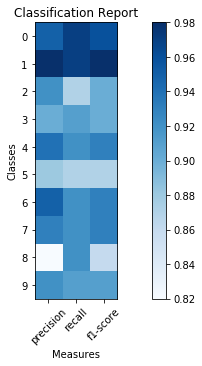

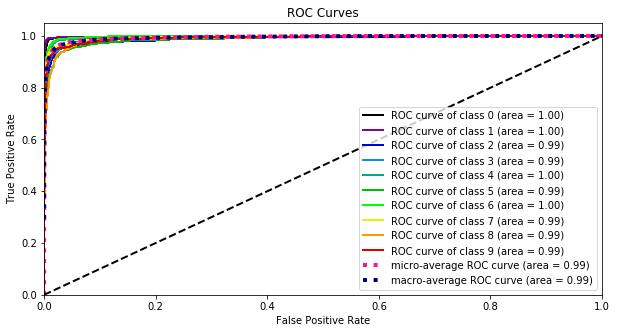

In [2]:
# Plotting Precision Recall (code from : https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report)
def plot_classification_report(cr, title='Classification Report', with_avg_total=False, cmap=plt.cm.Blues):
    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        if(len(t)==0): break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)
    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)
    plt.rcParams["figure.figsize"] = (10,5)
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

# Define the model class (to save space)
def createModel(learningRate, epochsN, batchSize):
    modelX = Sequential([
        Flatten(),
        Dense(84, activation=linear, use_bias=True,),
        Dense(10, activation=softmax)
    ])
    modelX.compile(adam(lr=learningRate), loss=sparse_categorical_crossentropy, metrics=['accuracy'])
    modelX.fit(train_X, train_y, batch_size=batchSize, epochs=epochsN, validation_split=0.1)
    return modelX
    
# Function to print the performance metrics (with plots)
def printPerformancePlots(modelX, testX, testY):
    pred = model.predict(testX, batch_size=64, verbose=1)
    pred_bool = np.argmax(pred, axis=1)
    print("Accuracy\t: " + str(accuracy_score(testY.astype('int'), pred_bool.astype('int'))))
    print("Precision\t: " + str(precision_score(testY.astype('int'), pred_bool.astype('int'), average='macro')))
    print("Recall\t\t: " + str(recall_score(testY.astype('int'), pred_bool.astype('int'), average='macro')))
    report = classification_report(testY.astype('int'), pred_bool.astype('int'))
    plot_classification_report(report)
    skplt.metrics.plot_roc_curve(testY.astype('int'), pred)
    plt.show()

LR = 0.001
EPOCH = 3
BATCH = 60
model = createModel(LR, EPOCH, BATCH)
model.summary()
printPerformancePlots(model, test_X, test_y)

<h3> Experiment 2 </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 3s 48us/step - loss: 9.6313 - accuracy: 0.3996 - val_loss: 9.7232 - val_accuracy: 0.3965
Epoch 2/3
54000/54000 [==============================] - 2s 45us/step - loss: 8.7633 - accuracy: 0.4561 - val_loss: 8.8250 - val_accuracy: 0.4523
Epoch 3/3
54000/54000 [==============================] - 2s 45us/step - loss: 9.0674 - accuracy: 0.4373 - val_loss: 9.1014 - val_accuracy: 0.4353
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                850       
Total params: 66,790
Trainabl

D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


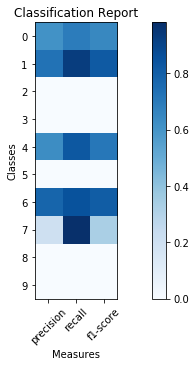

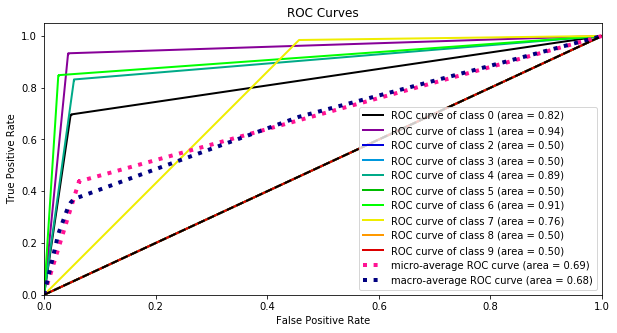

In [3]:
LR = 0.1
EPOCH = 3
BATCH = 60
model = createModel(LR, EPOCH, BATCH)
model.summary()
printPerformancePlots(model, test_X, test_y)

<h3> Experiment 3 </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.4306 - accuracy: 0.8814 - val_loss: 0.2584 - val_accuracy: 0.9298
Epoch 2/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2960 - accuracy: 0.9143 - val_loss: 0.2434 - val_accuracy: 0.9353
Epoch 3/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2805 - accuracy: 0.9194 - val_loss: 0.2424 - val_accuracy: 0.9315
Epoch 4/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2722 - accuracy: 0.9221 - val_loss: 0.2395 - val_accuracy: 0.9325
Epoch 5/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2663 - accuracy: 0.9241 - val_loss: 0.2408 - val_accuracy: 0.9340
Epoch 6/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2617 - accuracy: 0.9254 - val_loss: 0.2452 - val_accuracy: 0.9320
Epoch 7/10
54000/54000 [==============================] - 3s 52us/ste

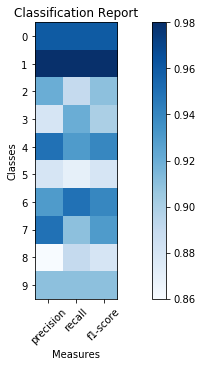

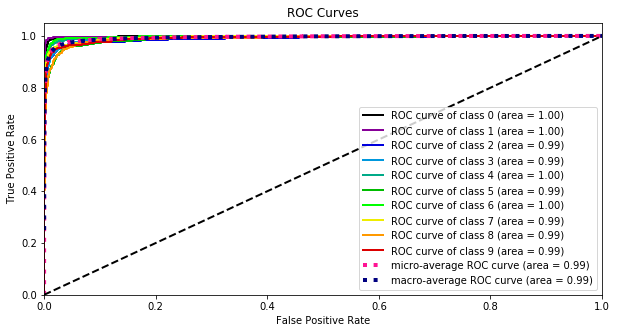

In [12]:
LR = 0.001
EPOCH = 10
BATCH = 60
model = createModel(LR, EPOCH, BATCH)
model.summary()
printPerformancePlots(model, test_X, test_y)

<h3> Experiment 4 </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 1s 24us/step - loss: 0.8850 - accuracy: 0.7900 - val_loss: 0.3808 - val_accuracy: 0.9052
Epoch 2/3
54000/54000 [==============================] - 1s 20us/step - loss: 0.3890 - accuracy: 0.8914 - val_loss: 0.2911 - val_accuracy: 0.9208
Epoch 3/3
54000/54000 [==============================] - 1s 21us/step - loss: 0.3309 - accuracy: 0.9072 - val_loss: 0.2646 - val_accuracy: 0.9277
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                850       
Total params: 66,790
Trainabl

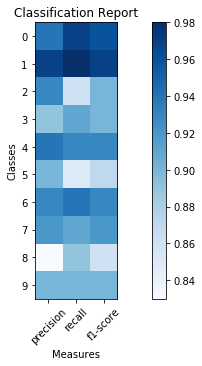

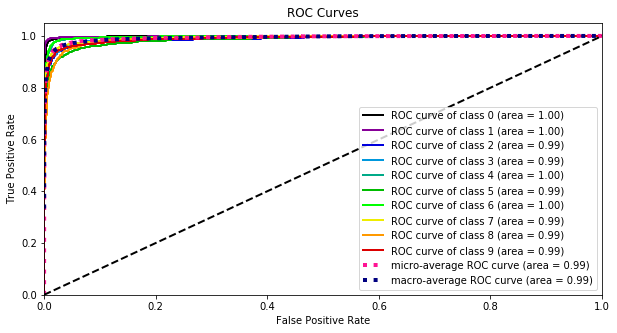

In [5]:
LR = 0.001
EPOCH = 3
BATCH = 600
model = createModel(LR, EPOCH, BATCH)
model.summary()
printPerformancePlots(model, test_X, test_y)

<h1>Convolutional Network</h1>
<h3> Experiment 1 (Conv.) </h3>
<b>>>></b> Build the model and train (fit).

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 397us/step - loss: 0.9758 - accuracy: 0.6911 - val_loss: 0.3300 - val_accuracy: 0.9045
Epoch 2/10
54000/54000 [==============================] - 22s 399us/step - loss: 0.3556 - accuracy: 0.8925 - val_loss: 0.2598 - val_accuracy: 0.9243
Epoch 3/10
54000/54000 [==============================] - 21s 389us/step - loss: 0.3026 - accuracy: 0.9070 - val_loss: 0.2375 - val_accuracy: 0.9247
Epoch 4/10
54000/54000 [==============================] - 21s 390us/step - loss: 0.2638 - accuracy: 0.9190 - val_loss: 0.1953 - val_accuracy: 0.9422
Epoch 5/10
54000/54000 [==============================] - 21s 392us/step - loss: 0.2305 - accuracy: 0.9292 - val_loss: 0.1737 - val_accuracy: 0.9475
Epoch 6/10
54000/54000 [==============================] - 24s 441us/step - loss: 0.2008 - accuracy: 0.9382 - val_loss: 0.1612 - val_accuracy: 0.9512
Epoch 7/10
54000/54000 [==============================] -

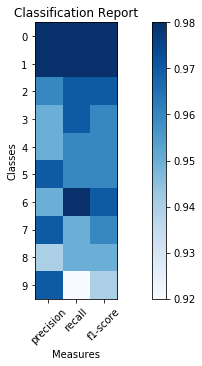

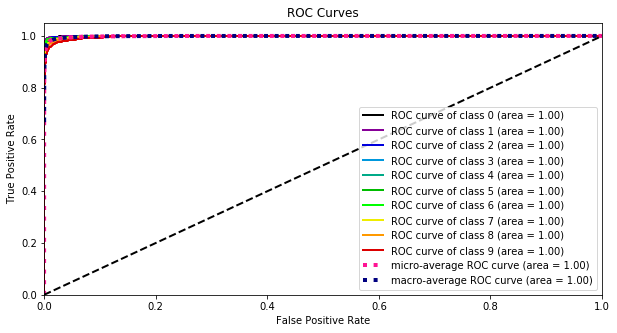

In [6]:
# Define the class model for Convolutional network
def createModelConv(kernelConv, strideConv, fMaps, activationConv, kernelPool, stridePool, poolingtype):
    learningRate = 0.001
    epochsN = 10
    batchSize = 60
    if poolingtype == 'max':
        modelX = Sequential([
            Conv2D(fMaps, (kernelConv, kernelConv), activation=activationConv, input_shape=(28, 28, 1), strides=(strideConv,strideConv)),
            MaxPooling2D((kernelPool, kernelPool), strides=stridePool),
            Flatten(),
            Dense(128, activation=relu, use_bias=True,),
            Dense(10, activation=softmax)
        ])
    else:
        modelX = Sequential([
            Conv2D(fMaps, (kernelConv, kernelConv), activation=activationConv, input_shape=(28, 28, 1), strides=(strideConv,strideConv)),
            AveragePooling2D((kernelPool, kernelPool), strides=stridePool),
            Flatten(),
            Dense(128, activation=relu, use_bias=True,),
            Dense(10, activation=softmax)
        ])
    modelX.compile(adam(lr=learningRate), loss=sparse_categorical_crossentropy, metrics=['accuracy'])
    modelX.fit(train_Xconv, train_y, batch_size=batchSize, epochs=epochsN, validation_split=0.1)
    return modelX

KERNEL_CONV = 5
STRIDE_CONV = 1
FMAPS = 6
ACTIVATION = 'sigmoid'
KERNEL_POOL = 2
STRIDE_POOL = 2
TYPE_POOL = 'average'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)

<h3> Experiment 2 (Conv.) </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 261us/step - loss: 0.8715 - accuracy: 0.7382 - val_loss: 0.3028 - val_accuracy: 0.9120
Epoch 2/10
54000/54000 [==============================] - 13s 236us/step - loss: 0.3137 - accuracy: 0.9041 - val_loss: 0.2130 - val_accuracy: 0.9367
Epoch 3/10
54000/54000 [==============================] - 13s 232us/step - loss: 0.2367 - accuracy: 0.9274 - val_loss: 0.1639 - val_accuracy: 0.9505
Epoch 4/10
54000/54000 [==============================] - 13s 239us/step - loss: 0.1870 - accuracy: 0.9419 - val_loss: 0.1385 - val_accuracy: 0.9607
Epoch 5/10
54000/54000 [==============================] - 14s 262us/step - loss: 0.1546 - accuracy: 0.9517 - val_loss: 0.1131 - val_accuracy: 0.9668
Epoch 6/10
54000/54000 [==============================] - 16s 302us/step - loss: 0.1326 - accuracy: 0.9589 - val_loss: 0.1120 - val_accuracy: 0.9632
Epoch 7/10
54000/54000 [==============================] -

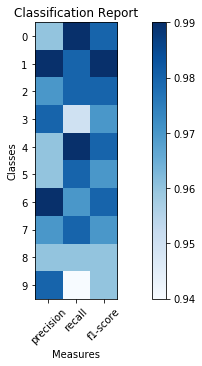

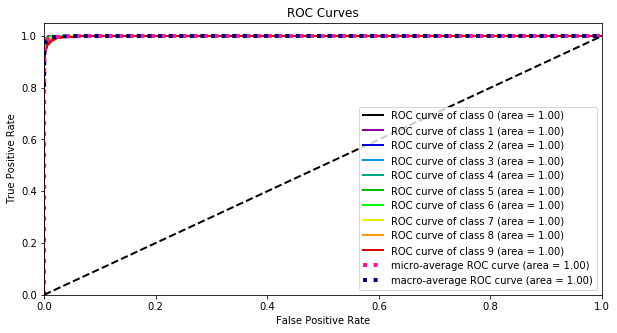

In [7]:
KERNEL_CONV = 10
STRIDE_CONV = 2
FMAPS = 6
ACTIVATION = 'sigmoid'
KERNEL_POOL = 2
STRIDE_POOL = 2
TYPE_POOL = 'average'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)

<h3> Experiment 3 (Conv.) </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 26s 485us/step - loss: 1.2927 - accuracy: 0.6032 - val_loss: 0.4277 - val_accuracy: 0.8892
Epoch 2/10
54000/54000 [==============================] - 26s 476us/step - loss: 0.4118 - accuracy: 0.8789 - val_loss: 0.2894 - val_accuracy: 0.9145
Epoch 3/10
54000/54000 [==============================] - 26s 483us/step - loss: 0.3367 - accuracy: 0.8999 - val_loss: 0.2481 - val_accuracy: 0.9250
Epoch 4/10
54000/54000 [==============================] - 26s 477us/step - loss: 0.3055 - accuracy: 0.9066 - val_loss: 0.2212 - val_accuracy: 0.9330
Epoch 5/10
54000/54000 [==============================] - 26s 477us/step - loss: 0.2796 - accuracy: 0.9140 - val_loss: 0.2185 - val_accuracy: 0.9312
Epoch 6/10
54000/54000 [==============================] - 26s 484us/step - loss: 0.2554 - accuracy: 0.9232 - val_loss: 0.1847 - val_accuracy: 0.9418
Epoch 7/10
54000/54000 [==============================] -

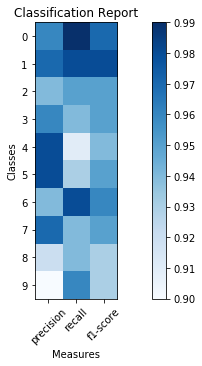

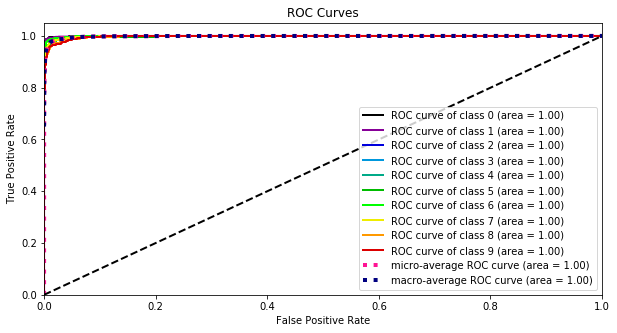

In [8]:
KERNEL_CONV = 5
STRIDE_CONV = 1
FMAPS = 6
ACTIVATION = 'sigmoid'
KERNEL_POOL = 4
STRIDE_POOL = 4
TYPE_POOL = 'average'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)

<h3> Experiment 4 (Conv.) </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 30s 550us/step - loss: 0.3443 - accuracy: 0.9016 - val_loss: 0.1460 - val_accuracy: 0.9558
Epoch 2/10
54000/54000 [==============================] - 29s 535us/step - loss: 0.1493 - accuracy: 0.9540 - val_loss: 0.1206 - val_accuracy: 0.9642
Epoch 3/10
54000/54000 [==============================] - 29s 534us/step - loss: 0.1055 - accuracy: 0.9674 - val_loss: 0.0837 - val_accuracy: 0.9757
Epoch 4/10
54000/54000 [==============================] - 29s 538us/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.0789 - val_accuracy: 0.9772
Epoch 5/10
54000/54000 [==============================] - 31s 573us/step - loss: 0.0665 - accuracy: 0.9789 - val_loss: 0.0677 - val_accuracy: 0.9805
Epoch 6/10
54000/54000 [==============================] - 29s 534us/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0640 - val_accuracy: 0.9812
Epoch 7/10
54000/54000 [==============================] -

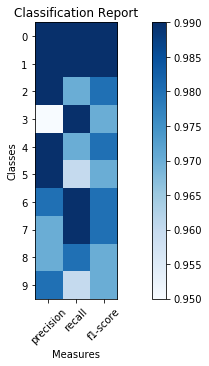

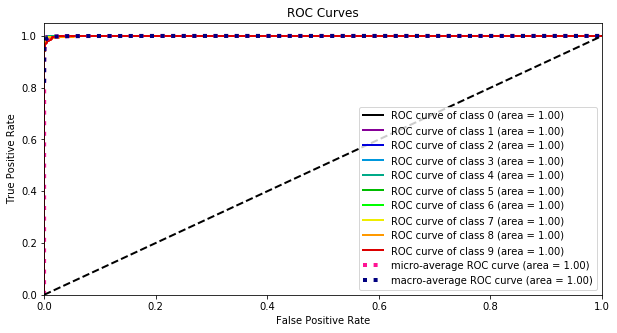

In [9]:
KERNEL_CONV = 5
STRIDE_CONV = 1
FMAPS = 6
ACTIVATION = 'tanh'
KERNEL_POOL = 2
STRIDE_POOL = 2
TYPE_POOL = 'average'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)

<h3> Experiment 5 (Conv.) </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 31s 579us/step - loss: 1.1954 - accuracy: 0.5980 - val_loss: 0.3451 - val_accuracy: 0.8945
Epoch 2/10
54000/54000 [==============================] - 28s 527us/step - loss: 0.3557 - accuracy: 0.8940 - val_loss: 0.2838 - val_accuracy: 0.9150
Epoch 3/10
54000/54000 [==============================] - 22s 411us/step - loss: 0.3112 - accuracy: 0.9061 - val_loss: 0.2242 - val_accuracy: 0.9332
Epoch 4/10
54000/54000 [==============================] - 22s 413us/step - loss: 0.2811 - accuracy: 0.9163 - val_loss: 0.2159 - val_accuracy: 0.9347
Epoch 5/10
54000/54000 [==============================] - 21s 397us/step - loss: 0.2494 - accuracy: 0.9247 - val_loss: 0.1778 - val_accuracy: 0.9477
Epoch 6/10
54000/54000 [==============================] - 22s 399us/step - loss: 0.2207 - accuracy: 0.9345 - val_loss: 0.1756 - val_accuracy: 0.9467
Epoch 7/10
54000/54000 [==============================] -

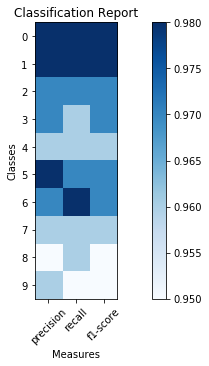

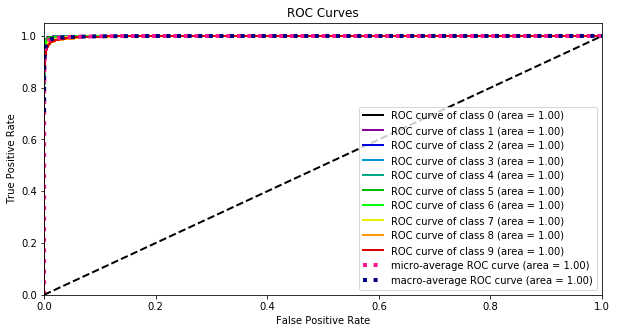

In [10]:
KERNEL_CONV = 5
STRIDE_CONV = 1
FMAPS = 6
ACTIVATION = 'sigmoid'
KERNEL_POOL = 2
STRIDE_POOL = 2
TYPE_POOL = 'max'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)

<h3> Experiment 6 (Conv.) </h3>

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 38s 708us/step - loss: 2.3067 - accuracy: 0.1124 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 2/10
54000/54000 [==============================] - 40s 745us/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 3/10
54000/54000 [==============================] - 38s 700us/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 4/10
54000/54000 [==============================] - 38s 700us/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 5/10
54000/54000 [==============================] - 38s 699us/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 6/10
54000/54000 [==============================] - 38s 701us/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 7/10
54000/54000 [==============================] -

D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


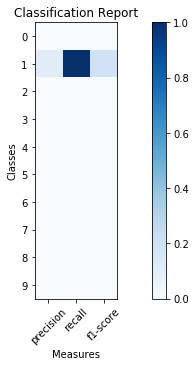

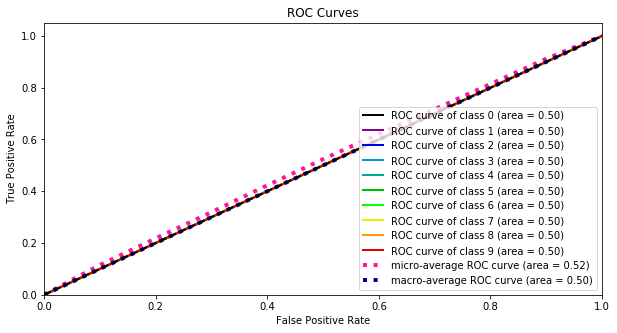

In [13]:
KERNEL_CONV = 5
STRIDE_CONV = 1
FMAPS = 24
ACTIVATION = 'sigmoid'
KERNEL_POOL = 2
STRIDE_POOL = 2
TYPE_POOL = 'average'
model = createModelConv(KERNEL_CONV, STRIDE_CONV, FMAPS, ACTIVATION, KERNEL_POOL, STRIDE_POOL, TYPE_POOL)
model.summary()
printPerformancePlots(model, test_Xconv, test_y)